In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [2]:
## load the dataset
df = pd.read_csv('uni_data.csv')
df

,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,Harvard University,1,7,9,1,1,1,1,5,100.00
1,Massachusetts Institute of Technology,2,9,17,3,12,4,4,1,91.67
2,Stanford University,3,17,11,5,4,2,2,15,89.50
3,University of Cambridge,1,10,24,4,16,16,11,50,86.17
4,California Institute of Technology,4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...,...,...
2195,University of the Algarve,7,367,567,218,926,845,812,816,44.03
2196,Alexandria University,4,236,566,218,997,908,645,871,44.03
2197,Federal University of Ceará,18,367,549,218,830,823,812,824,44.03
2198,University of A Coruña,40,367,567,218,886,974,812,651,44.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   institution           2200 non-null   object 
 1   national_rank         2200 non-null   int64  
 2   quality_of_education  2200 non-null   int64  
 3   alumni_employment     2200 non-null   int64  
 4   quality_of_faculty    2200 non-null   int64  
 5   publications          2200 non-null   int64  
 6   influence             2200 non-null   int64  
 7   citations             2200 non-null   int64  
 8   patents               2200 non-null   int64  
 9   score                 2200 non-null   float64
dtypes: float64(1), int64(8), object(1)
memory usage: 172.0+ KB


In [4]:
df = df.drop(columns=['institution'])
df

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,1,7,9,1,1,1,1,5,100.00
1,2,9,17,3,12,4,4,1,91.67
2,3,17,11,5,4,2,2,15,89.50
3,1,10,24,4,16,16,11,50,86.17
4,4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...,...
2195,7,367,567,218,926,845,812,816,44.03
2196,4,236,566,218,997,908,645,871,44.03
2197,18,367,549,218,830,823,812,824,44.03
2198,40,367,567,218,886,974,812,651,44.02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   national_rank         2200 non-null   int64  
 1   quality_of_education  2200 non-null   int64  
 2   alumni_employment     2200 non-null   int64  
 3   quality_of_faculty    2200 non-null   int64  
 4   publications          2200 non-null   int64  
 5   influence             2200 non-null   int64  
 6   citations             2200 non-null   int64  
 7   patents               2200 non-null   int64  
 8   score                 2200 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 154.8 KB


In [6]:
## correlation matrix
corr_matrix = df.corr()
corr_matrix

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
national_rank,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.159440,-0.199756
quality_of_education,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.528120,-0.600541
alumni_employment,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.528219,-0.510374
quality_of_faculty,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.555107,-0.693540
publications,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.671558,-0.522111
influence,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.611811,-0.522837
citations,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.598728,-0.522438
patents,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,1.000000,-0.474810
score,-0.199756,-0.600541,-0.510374,-0.693540,-0.522111,-0.522837,-0.522438,-0.474810,1.000000


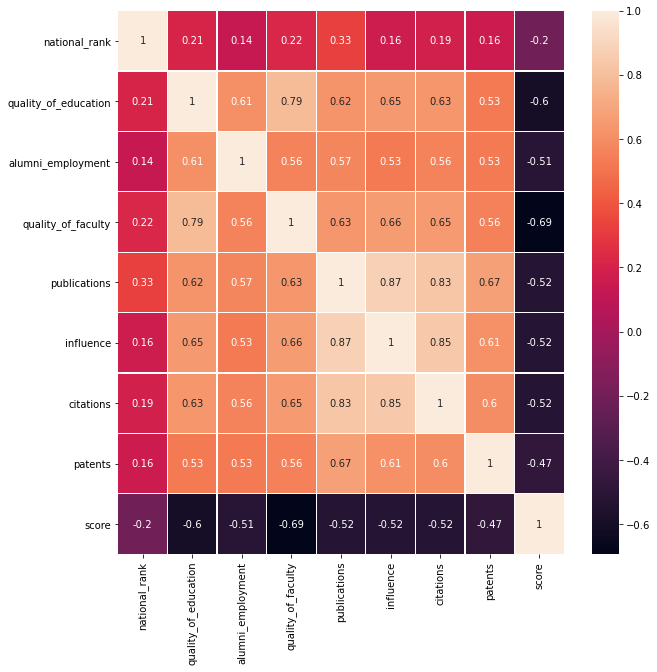

In [7]:
## heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,annot=True, linewidths=0.1)

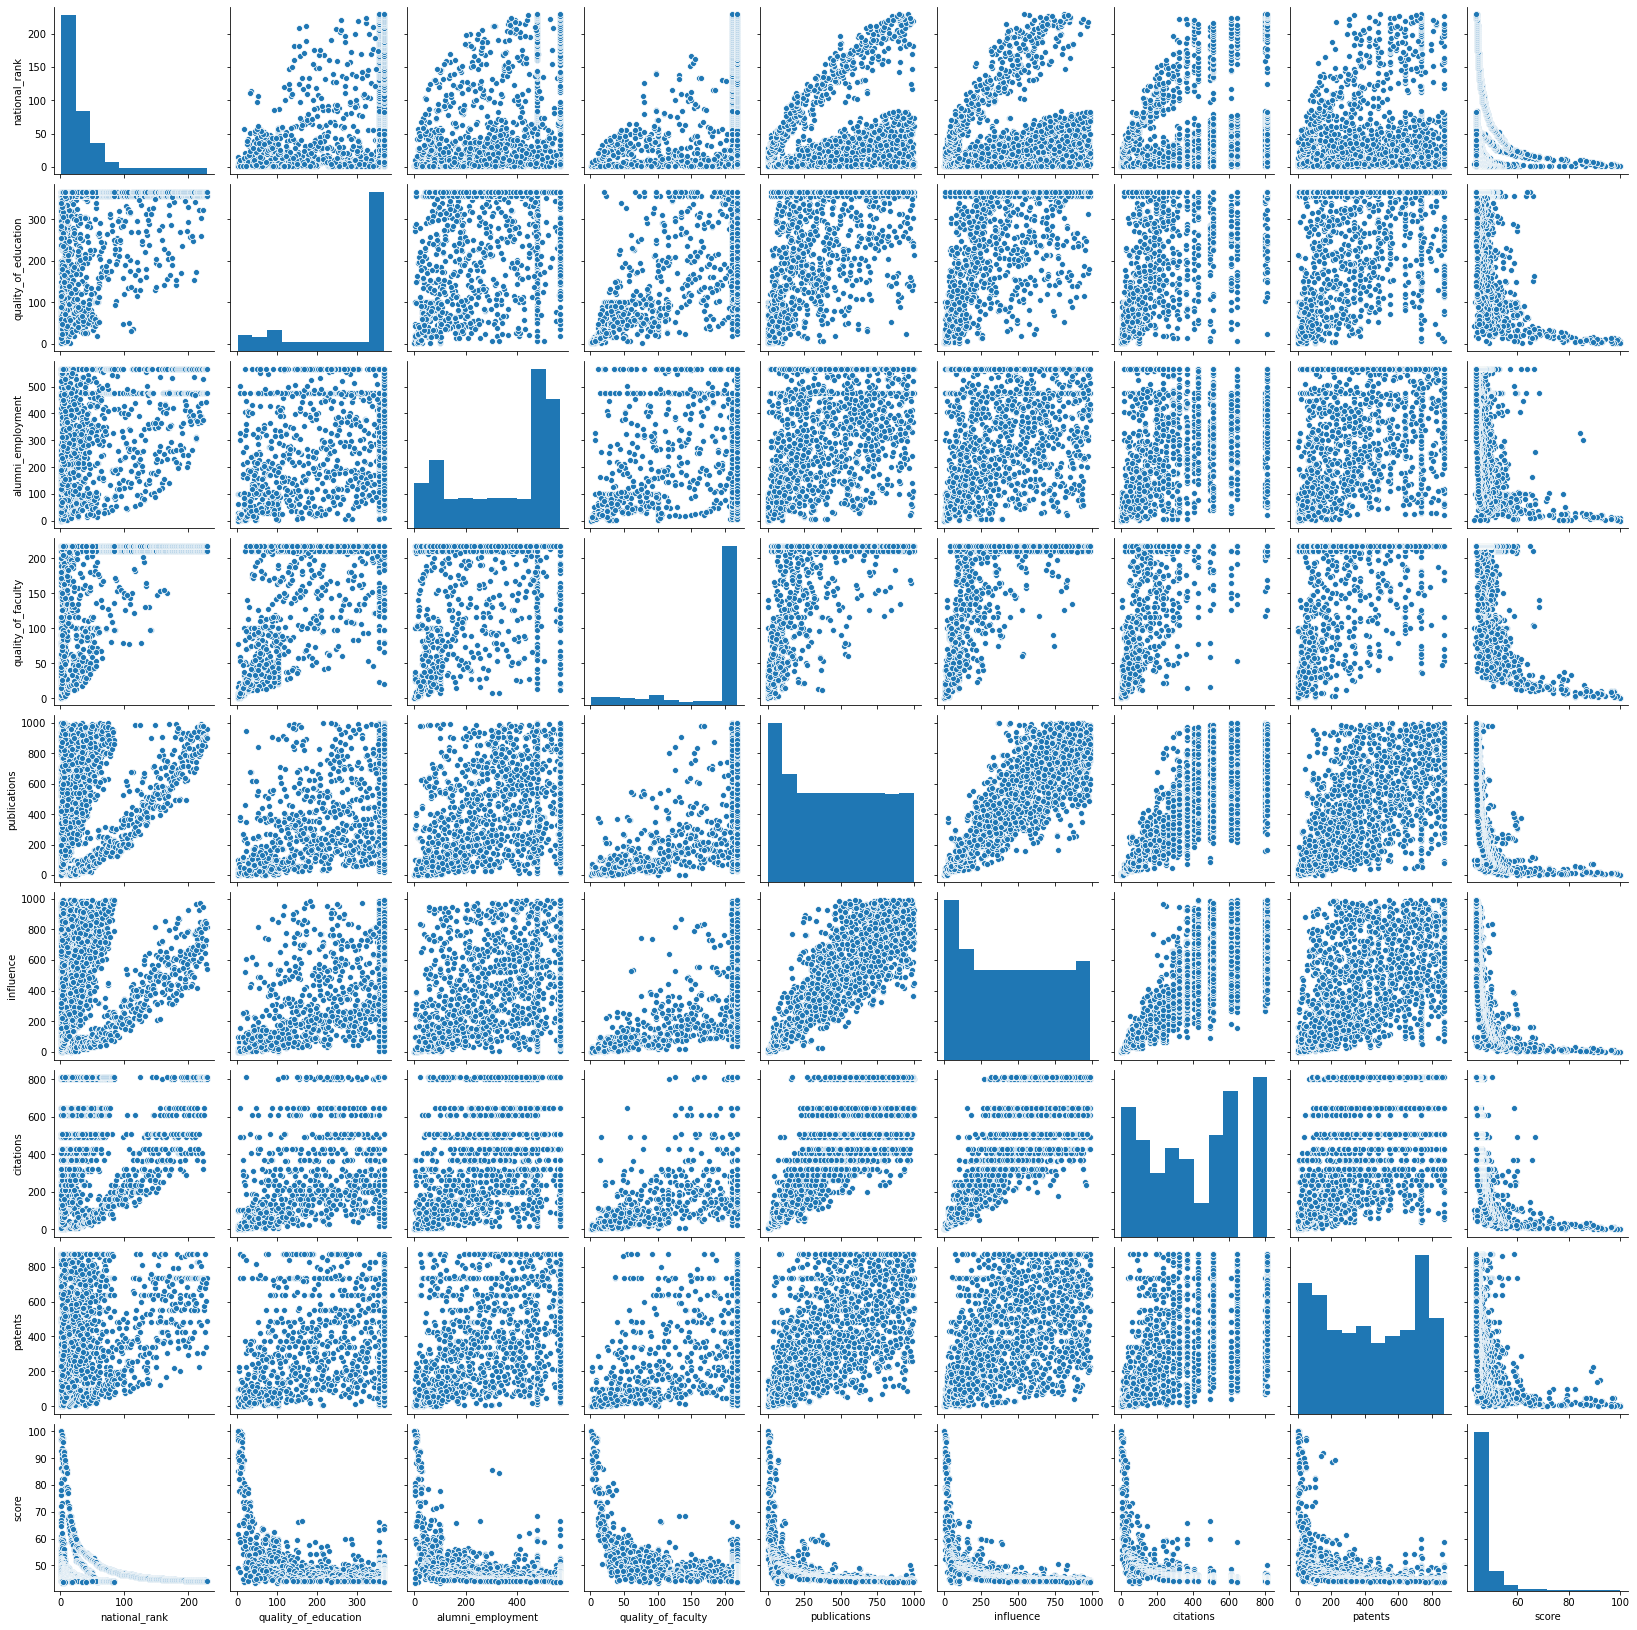

In [8]:
sns.pairplot(df)

In [11]:
# split the data into independent and dependent variable    ##classsification
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:8].values  ##  same as X = df.iloc[:, 0:3002].values
y = df.iloc[:, -1].values


In [12]:
## split the data into trainig and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 32)

In [13]:
## LINEAR REGESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [14]:
pred_lin = lin_reg.predict(X_test)

In [15]:
## dataframe for predictions
pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_lin})

,Actual,Predicted
0,44.54,42.690109
1,68.39,62.084504
2,44.46,44.273075
3,44.70,43.531494
4,45.01,45.567942
...,...,...
435,44.31,44.401217
436,44.50,41.907230
437,44.52,46.631037
438,51.29,50.055225


In [16]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 2.6334856307904566
MSE: 27.093492485559437
RMSE: 5.205140966924858
R2: 0.4731872521292173


In [18]:
## RIDGE REGRESSION
model_rigre = Ridge(alpha=0.99, random_state = 32)
model_rigre.fit(X_train, y_train)

Ridge(alpha=0.99, random_state=32)

In [19]:
## prediction
pred_ridge = model_rigre.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': pred_ridge})

,Actual,Prediction
0,44.54,42.690109
1,68.39,62.084502
2,44.46,44.273075
3,44.70,43.531494
4,45.01,45.567943
...,...,...
435,44.31,44.401216
436,44.50,41.907230
437,44.52,46.631037
438,51.29,50.055226


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 2.633485598878971
MSE: 27.093492349995525
RMSE: 5.20514095390274
R2: 0.47318725476515655


In [24]:
## LASSO - RIDGE REGRESSION
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [25]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_lasso})

,Actual,Predicted
0,44.54,42.740025
1,68.39,62.042899
2,44.46,44.251692
3,44.70,43.530080
4,45.01,45.573411
...,...,...
435,44.31,44.397775
436,44.50,41.951993
437,44.52,46.600819
438,51.29,50.052105


In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 2.627372829623317
MSE: 27.079237478055337
RMSE: 5.203771466739805
R2: 0.4734644301149701


In [21]:
## POLYNOMIAL REGRESSION
poly_reg = PolynomialFeatures(degree=2)
x_train_2 = poly_reg.fit_transform(X_train)
x_test_2 = poly_reg.transform(X_test)
mul_reg = LinearRegression()
mul_reg.fit(x_train_2,y_train)

LinearRegression()

In [22]:
mul_pred = mul_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test, 'Prediction': mul_pred})

,Actual,Prediction
0,44.54,46.556411
1,68.39,69.856613
2,44.46,44.025120
3,44.70,47.113858
4,45.01,42.590018
...,...,...
435,44.31,44.220256
436,44.50,46.080929
437,44.52,39.030700
438,51.29,50.304109


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 2.2748217664810153
MSE: 13.441742655721745
RMSE: 3.666298222420231
R2: 0.7386353424754326


In [27]:
## RANDOM FOREST REGRESSION
rf_reg = RandomForestRegressor(n_estimators=100 ,random_state=32)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=32)

In [28]:
pred_rf = rf_reg.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_rf})

,Actual,Predicted
0,44.54,44.5063
1,68.39,70.5072
2,44.46,44.5718
3,44.70,44.9171
4,45.01,45.0782
...,...,...
435,44.31,44.4205
436,44.50,44.1634
437,44.52,44.5140
438,51.29,51.1925


In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('R2:', metrics.r2_score(y_test, pred_rf))

MAE: 0.5578196212121239
MSE: 1.629442302915411
RMSE: 1.2764961037603721
R2: 0.9683167100899491
